In [198]:
from synth_dim_model import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


In [203]:
N = 2 # real sites
M = 20 # synthetic sites per site

C:\Users\jwdes\AppData\Local\Temp\ipykernel_130756\2352175951.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gist_rainbow", M**N)


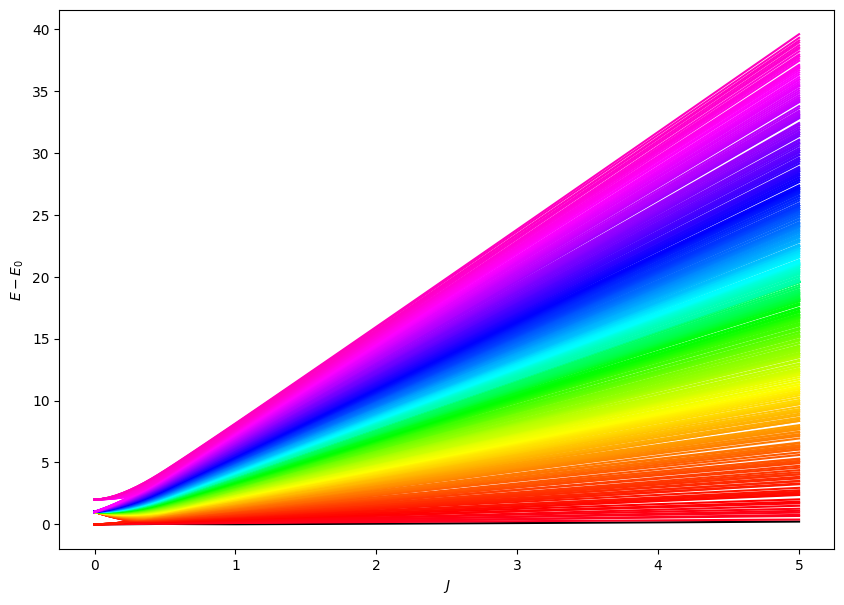

In [204]:
# Parameters for J variation
lower_bound_J = 0
upper_bound_J = 5
V_fixed = 1  # Keep V constant

# Calculate the ground state degeneracy (for reference or further use)
gs_deg = estimate_ground_state_degeneracy_zero_J(N, M)

Js = np.linspace(lower_bound_J, upper_bound_J, 100)

# Calculate instantaneous eigenvalues for varying J
instantenous_eigenvalues_J = []
for J in Js:
    instantenous_hamiltonian = construct_hamiltonian(N, M, J, V_fixed)
    temp_instantenous_eigenvalues, _ = exact_diagonalize(instantenous_hamiltonian)
    instantenous_eigenvalues_J.append(temp_instantenous_eigenvalues)

# Calculate initial and final ground state energies for varying J
initial_hamiltonian_J = construct_hamiltonian(N, M, J=lower_bound_J, V=V_fixed)
final_hamiltonian_J = construct_hamiltonian(N, M, J=upper_bound_J, V=V_fixed)

initial_eigenvalues_J, _ = exact_diagonalize(initial_hamiltonian_J)
final_eigenvalues_J, _ = exact_diagonalize(final_hamiltonian_J)

# Plotting for varying J
fig, ax = plt.subplots(figsize=(10, 7))
cmap = get_cmap("gist_rainbow", M**N)

for idx in range(len(instantenous_eigenvalues_J[0])):  # Iterate over eigenvalues
    # Calculate E_i - E_0 for each J
    eigenvalues = [instantenous_eigenvalues_J[j][idx] - min(instantenous_eigenvalues_J[j]) for j in range(len(Js))]
    color = cmap(idx)
    if idx == 0:
        pass
    elif idx == 1:
        ax.plot(Js, eigenvalues, '-k')
    else:
        ax.plot(Js, eigenvalues, '-', color=color)
        
# Plot final and initial ground state energies for varying J (adjusted to zero)
final_ground_state_energy = min(final_eigenvalues_J)
initial_ground_state_energy = min(initial_eigenvalues_J)

final_eigenvalues_adjusted = [E - final_ground_state_energy for E in final_eigenvalues_J]
initial_eigenvalues_adjusted = [E - initial_ground_state_energy for E in initial_eigenvalues_J]

ax.set_xlabel("$J$")
ax.set_ylabel("$E - E_0$")
plt.show()


In [205]:
# Define threshold for identifying "close to zero" values
threshold = 1e-5

counter = 0
for i in range(int(len(instantenous_eigenvalues_J))):
    eigenvalues = [instantenous_eigenvalues_J[j][i] - min(instantenous_eigenvalues_J[j]) for j in range(len(Js))]
    color = cmap(i)
    is_close_to_zero = eigenvalues[0] < threshold
    if is_close_to_zero:
        counter += 1

C:\Users\jwdes\AppData\Local\Temp\ipykernel_130756\502381803.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("gist_rainbow", counter)


(0.0, 2.0)

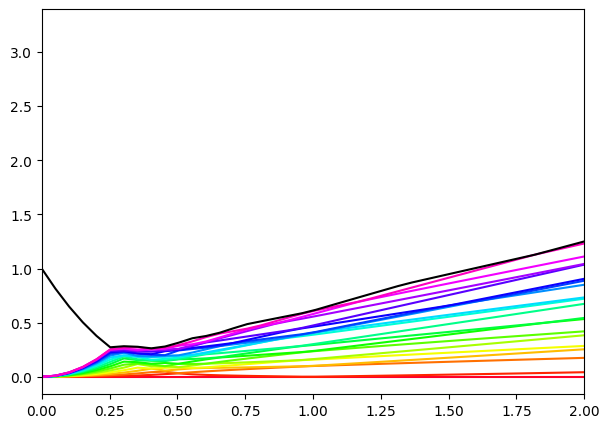

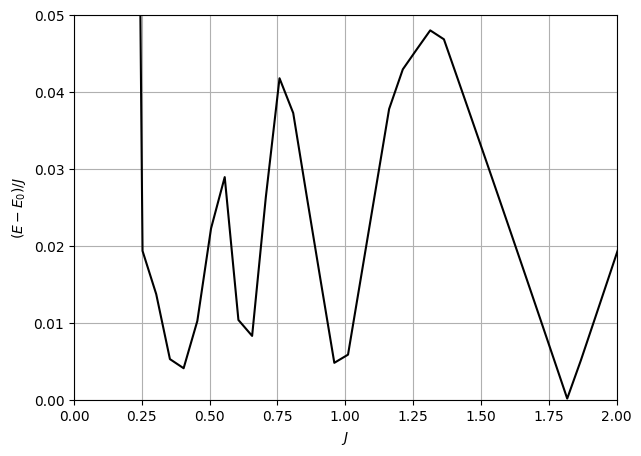

In [209]:
fig, ax = plt.subplots(figsize=(7, 5))
cmap = get_cmap("gist_rainbow", counter)

# Plotting
for i in range(int(counter)):
    eigenvalues = [instantenous_eigenvalues_J[j][i] - min(instantenous_eigenvalues_J[j]) for j in range(len(Js))]
    color = cmap(i)
    is_close_to_zero = eigenvalues[0] < threshold
    if is_close_to_zero:
        ax.plot(Js, eigenvalues, color=color)
    else:
        ax.plot(Js, eigenvalues, "-k")
        
ax.plot(Js, [instantenous_eigenvalues_J[j][counter] - min(instantenous_eigenvalues_J[j]) for j in range(len(Js))], 'k')
ax.set_xlim(0,2)

eigenvalues_largest_gs_deg = [instantenous_eigenvalues_J[j][counter-1] - min(instantenous_eigenvalues_J[j]) for j in range(len(Js))]
eigenvalues_smallest_non_gs_deg = [instantenous_eigenvalues_J[j][counter] - min(instantenous_eigenvalues_J[j]) for j in range(len(Js))]    
        
fig, ax = plt.subplots(figsize = (7,5))
ax.plot(Js, np.array(eigenvalues_smallest_non_gs_deg)-np.array(eigenvalues_largest_gs_deg), color = 'k')
ax.set_xlabel("$J$")
ax.set_ylabel("$(E-E_0)/J$")
ax.grid()
ax.set_ylim(0,0.05)
ax.set_xlim(0,2)

